## Use balance dataset and perform the following:
1. Implement Pre-processing functions
    - Check for NULL values in the dataset. If any NULL value is present then treat it accordingly.
    - extract only feature columns from the dataset.
2. Determine the number of clusters using dendogram. Use single linkage method.
3. Apply agglomerative clustering using single linkage method.
4. Form the clusters.
5. Evaluate the quality of clusters formed by agglomerative clustering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:\\Dataset\\balance.csv", header=None)
display(data.sample(5))

,0,1,2,3,4
279,L,3,2,1,5
355,L,3,5,2,1
505,L,5,1,2,1
208,B,2,4,2,4
54,R,1,3,1,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       625 non-null    object
 1   1       625 non-null    int64 
 2   2       625 non-null    int64 
 3   3       625 non-null    int64 
 4   4       625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [4]:
print(data.iloc[:, 0].unique())
print(data.iloc[:, 1].unique())
print(data.iloc[:, 2].unique())
print(data.iloc[:, 3].unique())
print(data.iloc[:, 4].unique())

['B' 'R' 'L']
[1 2 3 4 5]
[1 2 3 4 5]
[1 2 3 4 5]
[1 2 3 4 5]


In [5]:
from sklearn.preprocessing import LabelEncoder

leber = LabelEncoder()
data.iloc[:, 0] = leber.fit_transform(data.iloc[:, 0])

In [6]:
display(data.head())

,0,1,2,3,4
0,0,1,1,1,1
1,2,1,1,1,2
2,2,1,1,1,3
3,2,1,1,1,4
4,2,1,1,1,5


In [7]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [8]:
from sklearn.preprocessing import StandardScaler, Normalizer

X = StandardScaler().fit_transform(X)
X = Normalizer().fit_transform(X)

In [9]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2) 
X = pca.fit_transform(X)  

In [10]:
from scipy.cluster.hierarchy import linkage

Z = linkage(X, method ='single')

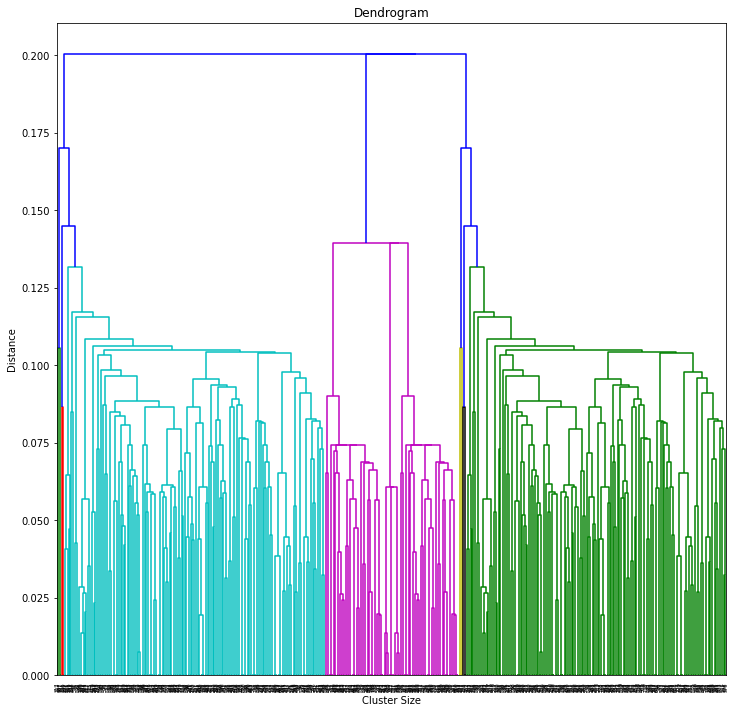

In [11]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(12,12))
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

### Dendogram indicates n_cluster = 3 is a better choice.

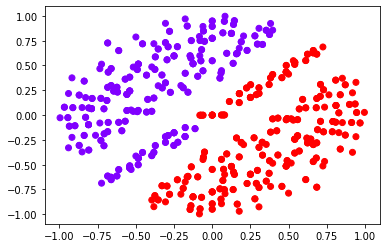

In [12]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2)
plt.scatter(X[:,0], X[:,1], c = ac.fit_predict(X), cmap ='rainbow')
plt.show()

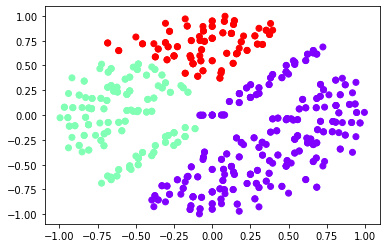

In [13]:
ac = AgglomerativeClustering(n_clusters=3)
plt.scatter(X[:,0], X[:,1], c = ac.fit_predict(X), cmap ='rainbow') 
plt.show()

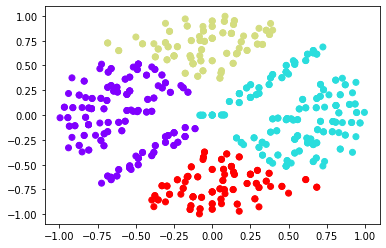

In [14]:
ac = AgglomerativeClustering(n_clusters=4)
plt.scatter(X[:,0], X[:,1], c = ac.fit_predict(X), cmap ='rainbow') 
plt.show()

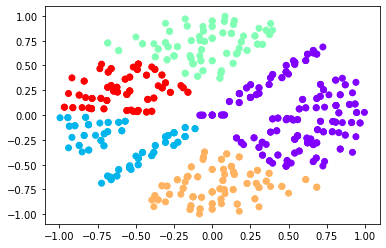

In [15]:
ac = AgglomerativeClustering(n_clusters=5)
plt.scatter(X[:,0], X[:,1], c = ac.fit_predict(X), cmap ='rainbow')
plt.show()

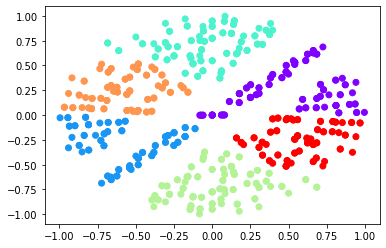

In [16]:
ac = AgglomerativeClustering(n_clusters=6)
plt.scatter(X[:,0], X[:,1], c = ac.fit_predict(X), cmap ='rainbow')
plt.show()

In [17]:
from sklearn.metrics import silhouette_score 

k = [2, 3, 4, 5, 6]
sil_scr = [] 

for x in k:
    ac = AgglomerativeClustering(n_clusters = x) 
    sil_scr.append(silhouette_score(X, ac.fit_predict(X)))

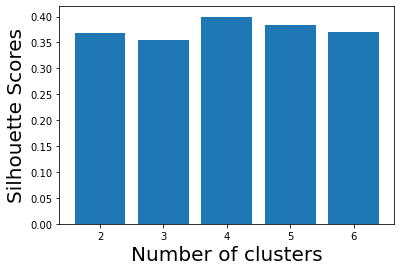

In [18]:
plt.bar(k, sil_scr) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('Silhouette Scores', fontsize = 20) 
plt.show() 

### Silhouette Scores indicates n_cluster = 4 is a better choice.